# Import

In [1]:
# Import all the necessary packages.

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import sklearn
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns

from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

import warnings  
warnings.filterwarnings('ignore')

In [2]:
# Import Dataset.
df = pd.read_csv('spotify2024.csv', encoding = 'unicode_escape')

In [3]:
# View DataFrame.

print(df.shape)
df.head()

(4600, 29)


,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


## Metadata

- `Track Name`: Name of the song.


- `Album Name`: Name of the album the song belongs to.


- `Artist`: Name of the artist(s) of the song.


- `Release Date`: Date when the song was released.


- `ISRC`: International Standard Recording Code for the song.


- `All Time Rank`: Ranking of the song based on its all-time popularity.


- `Track Score`: Score assigned to the track based on various factors.


- `Spotify Streams`: Total number of streams on Spotify.


- `Spotify Playlist Count`: Number of Spotify playlists the song is included in.


- `Spotify Playlist Reach`: Reach of the song across Spotify playlists.


- `Spotify Popularity`: Popularity score of the song on Spotify.


- `YouTube Views`: Total views of the song's official video on YouTube.


- `YouTube Likes`: Total likes on the song's official video on YouTube.


- `TikTok Posts`: Number of TikTok posts featuring the song.


- `TikTok Likes`: Total likes on TikTok posts featuring the song.


- `TikTok Views`: Total views on TikTok posts featuring the song.


- `YouTube Playlist Reach`: Reach of the song across YouTube playlists.


- `Apple Music Playlist Count`: Number of Apple Music playlists the song is included in.


- `AirPlay Spins`: Number of times the song has been played on radio stations.


- `SiriusXM Spins`: Number of times the song has been played on SiriusXM.


- `Deezer Playlist Count`: Number of Deezer playlists the song is included in.


- `Deezer Playlist Reach`: Reach of the song across Deezer playlists.


- `Amazon Playlist Count`: Number of Amazon Music playlists the song is included in.


- `Pandora Streams`: Total number of streams on Pandora.


- `Pandora Track Stations`: Number of Pandora stations featuring the song.


- `Soundcloud Streams`: Total number of streams on Soundcloud.


- `Shazam Counts`: Total number of times the song has been Shazamed.


- `TIDAL Popularity`: Popularity score of the song on TIDAL.


- `Explicit Track`: Indicates whether the song contains explicit content.

## Sense-Check Data

In [4]:
# Info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [5]:
# View null values.
df.isnull().sum().sort_values(ascending = False)

TIDAL Popularity              4600
Soundcloud Streams            3333
SiriusXM Spins                2123
Pandora Track Stations        1268
TikTok Posts                  1173
Pandora Streams               1106
Amazon Playlist Count         1055
YouTube Playlist Reach        1009
TikTok Views                   981
TikTok Likes                   980
Deezer Playlist Reach          928
Deezer Playlist Count          921
Spotify Popularity             804
Shazam Counts                  577
Apple Music Playlist Count     561
AirPlay Spins                  498
YouTube Likes                  315
YouTube Views                  308
Spotify Streams                113
Spotify Playlist Reach          72
Spotify Playlist Count          70
Artist                           5
Track                            0
Album Name                       0
Track Score                      0
All Time Rank                    0
ISRC                             0
Release Date                     0
Explicit Track      

I will drop columns that have too many null values and / or will not be integral to analysis.

In [6]:
# Drop columns.
df.drop(columns = ['Soundcloud Streams','TIDAL Popularity',
                   'SiriusXM Spins', 'Pandora Track Stations'],
                   axis = 1, inplace = True)

# View df info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

#### Transform object / strings to numbers (remove '.'s & ','s)

In [7]:
# Define a function.
def from_str_to_int(s):
    if type(s)!= type(""): return s
    if '.' in s: s = s.replace('.','')
    if ',' in s: s = s.replace(',','')
    return int(s)

In [8]:
# Select columns to transform in a list.
cols_to_int = ['All Time Rank','Spotify Streams','Spotify Playlist Count',
               'Spotify Playlist Reach','YouTube Views','YouTube Likes',
               'TikTok Posts','TikTok Likes','TikTok Views','YouTube Playlist Reach',
               'AirPlay Spins','Shazam Counts','Deezer Playlist Reach','Pandora Streams']

In [9]:
# Create a loop to run the function through df.
for i in cols_to_int:
    df[i] = df[i].apply(from_str_to_int)

In [10]:
# View df.
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,3.904709e+08,30716.0,196631588.0,...,5.332282e+09,1.505970e+08,210.0,40975.0,62.0,17598718.0,114.0,18004655.0,2669262.0,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,3.237039e+08,28113.0,174597137.0,...,2.083390e+08,1.563804e+08,188.0,40778.0,67.0,10422430.0,111.0,7780028.0,1118279.0,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,6.013093e+08,54331.0,211607669.0,...,3.369121e+09,3.737850e+08,190.0,74333.0,136.0,36321847.0,172.0,5022621.0,5285340.0,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,2.031281e+09,269802.0,136569078.0,...,1.460373e+10,3.351189e+09,394.0,1474799.0,264.0,24684248.0,210.0,190260277.0,11822942.0,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,1.070349e+08,7223.0,151469874.0,...,NaN,1.127639e+08,182.0,12185.0,82.0,17660624.0,105.0,4493884.0,457017.0,1


In [11]:
# View df info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   int64  
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   float64
 8   Spotify Playlist Count      4530 non-null   float64
 9   Spotify Playlist Reach      4528 non-null   float64
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   float64
 12  YouTube Likes               4285 non-null   float64
 13  TikTok Posts                3427 

In [12]:
# Convert 'Release Date' data to datetime.
from datetime import datetime

df['Release Date'] = df['Release Date'].apply(lambda x: datetime.strptime(x,'%m/%d/%Y'))

In [13]:
# Create a 'Year' column.
df['Year'] = df['Release Date'].dt.year

In [14]:
# Replace null 'artist' values with "unknown".
df['Artist'] = df['Artist'].fillna('unknown')

In [15]:
# Replace null values in numeric columns with median values.
cols_obj = ['Track','Album Name','Artist','ISRC']
for i in df.columns:
    if i not in cols_obj:
        df[i] = df[i].fillna(df[i].median())

In [16]:
# View df info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4600 non-null   object        
 1   Album Name                  4600 non-null   object        
 2   Artist                      4600 non-null   object        
 3   Release Date                4600 non-null   datetime64[ns]
 4   ISRC                        4600 non-null   object        
 5   All Time Rank               4600 non-null   int64         
 6   Track Score                 4600 non-null   float64       
 7   Spotify Streams             4600 non-null   float64       
 8   Spotify Playlist Count      4600 non-null   float64       
 9   Spotify Playlist Reach      4600 non-null   float64       
 10  Spotify Popularity          4600 non-null   float64       
 11  YouTube Views               4600 non-null   float64     

In [17]:
# Create a list of track_ids.
ids = df['ISRC']

# Show duplicates.
df[ids.isin(ids[ids.duplicated()])].sort_values('ISRC')

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Shazam Counts,Explicit Track,Year
2449,Tennessee Orange,Tennessee Orange,Megan Moroney,2022-09-02,TCAGJ2289254,2424,28.9,227893586.0,28139.0,12480714.0,...,238206228.0,33.0,129172.0,5.0,1370.0,49.0,56972562.0,708143.0,0,2022
2450,Tennessee Orange,Tennessee Orange,Megan Moroney,2022-09-02,TCAGJ2289254,2424,28.9,227893586.0,28139.0,12480714.0,...,238206228.0,33.0,129172.0,5.0,1370.0,49.0,56972562.0,708143.0,0,2022
3447,Dembow,Dembow,Danny Ocean,2017-12-08,USWL11700269,3441,23.3,579189526.0,60397.0,11805084.0,...,199705679.0,34.0,5406.0,20.0,37649.0,12.0,6723858.0,1619550.0,0,2017
3450,Dembow,Dembow,Danny Ocean,2017-12-08,USWL11700269,3441,23.3,579189526.0,60397.0,11805084.0,...,199705679.0,34.0,5406.0,20.0,37649.0,12.0,6723858.0,1619550.0,0,2017


In [18]:
# Drop duplicate rows.
df = df.drop_duplicates(subset = ['ISRC'], keep = 'first')

# Show duplicates.
df[df.duplicated(keep = False)]

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Shazam Counts,Explicit Track,Year


In [19]:
# Change formatting of decimal placing in df.
pd.options.display.float_format = '{:.2f}'.format

In [20]:
# View descriptive statistics.
df.describe()

,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,...,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Shazam Counts,Explicit Track,Year
count,4598.00,4598.00,4598.00,4598.00,4598.00,4598.00,4598.00,4598.00,4598.00,4598.00,...,4598.00,4598.00,4598.00,4598.00,4598.00,4598.00,4598.00,4598.00,4598.00,4598.00
mean,2290.40,41.85,442305987.28,58985.17,23193732.04,64.11,385735283.53,2816063.93,750261.14,94327275.55,...,290071547.18,51.37,49806.67,28.85,1081997.36,23.43,68147842.94,2319602.54,0.36,2020.62
std,1323.06,38.55,532860205.52,70679.71,29485986.02,14.77,681064755.45,4454401.38,2134201.09,489103862.92,...,601182867.23,67.68,121775.84,49.04,3205492.95,23.08,149619463.95,5675627.01,0.48,3.61
min,1.00,19.40,1071.00,1.00,1.00,1.00,913.00,25.00,1.00,3.00,...,1.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,0.00,1987.00
25%,1144.25,23.30,73153081.75,7017.25,4896218.75,62.00,45764910.00,448653.00,67425.00,9398119.75,...,22554872.75,12.00,707.25,7.00,83468.00,10.00,2599863.00,288464.50,0.00,2019.00
50%,2289.50,29.90,239850720.00,32312.50,13259481.00,67.00,148269610.00,1257935.00,182200.00,26534406.00,...,98142716.00,28.00,5953.50,15.00,237120.50,17.00,12735768.50,854584.00,0.00,2022.00
75%,3435.75,44.48,611891973.75,84952.75,29313280.00,71.00,420280776.25,3354939.00,460333.75,67297648.75,...,232412053.50,60.00,36434.25,30.00,608075.25,28.00,46535770.00,2243323.50,1.00,2023.00
max,4998.00,725.40,4281468720.00,590392.00,262343414.00,96.00,16322756555.00,62311179.00,42900000.00,23474223833.00,...,7289707052.00,859.00,1777811.00,632.00,48197850.00,210.00,1463624043.00,219794543.00,1.00,2024.00


# EDA

In [21]:
# Create a subset of numeric features.
numeric_features = df.select_dtypes(include = ['float64', 'int64']).columns

numeric_df = df[numeric_features]

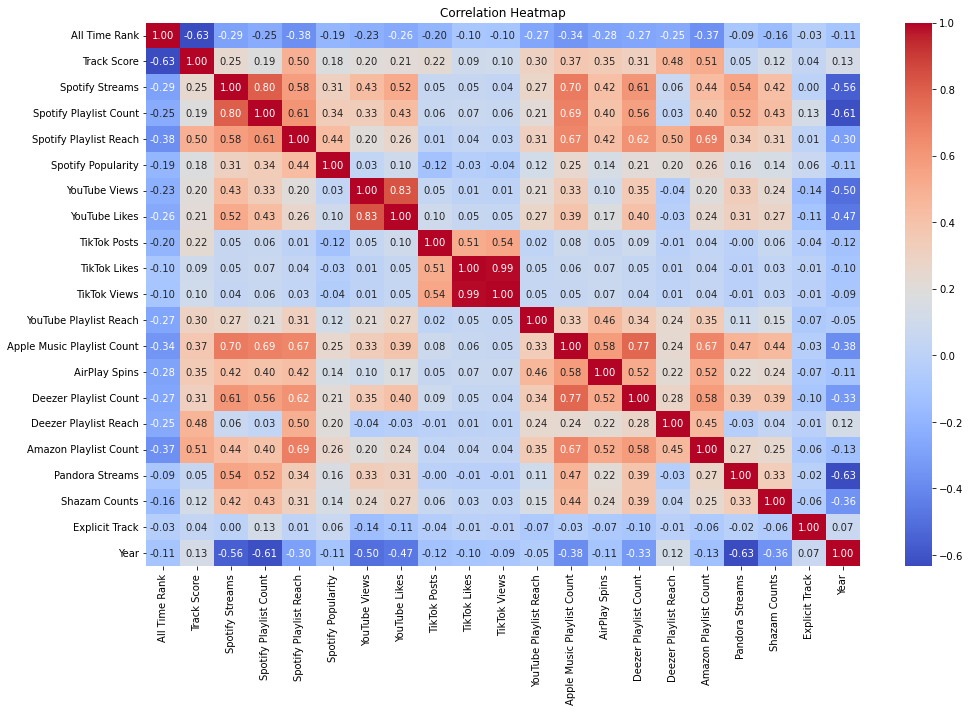

In [22]:
# Visualize the correlation matrix
plt.figure(figsize = (16, 10))

sns.heatmap(numeric_df.corr(),
            annot = True,
            fmt = '.2f',
            cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Apple Music Playlist Count vs. Deezer Playlist Count

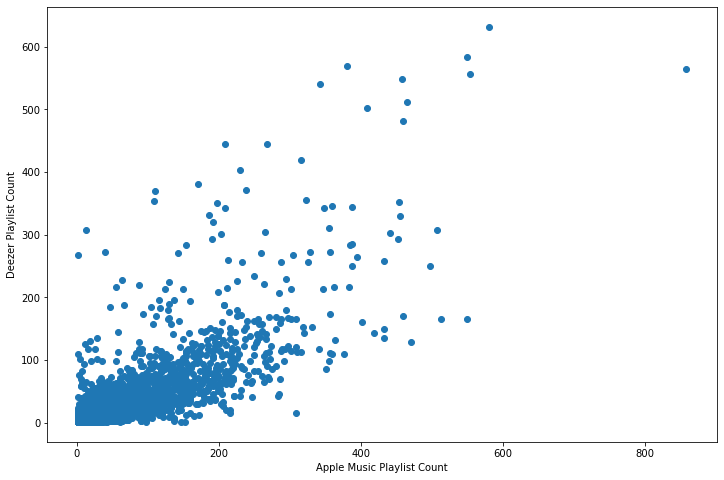

In [23]:
# Create scatterplot.
plt.figure(figsize = (12, 8))
plt.scatter(df['Apple Music Playlist Count'], df['Deezer Playlist Count'])
plt.xlabel('Apple Music Playlist Count')
plt.ylabel('Deezer Playlist Count')
plt.show()

## Spotify Popularity vs. Track Score

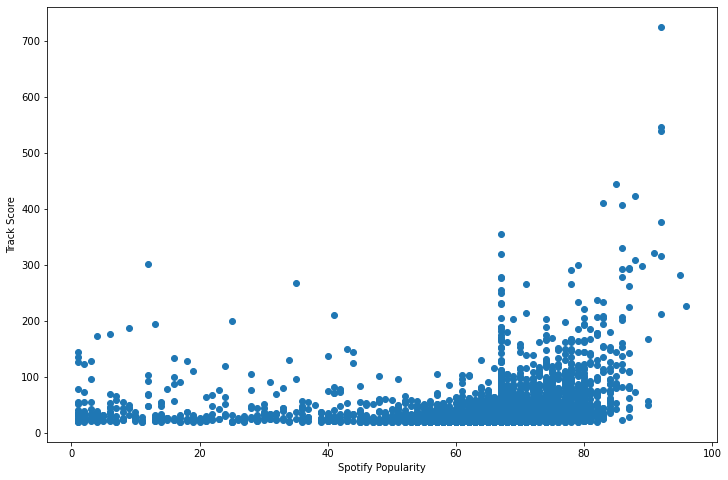

In [24]:
# Create scatterplot.
plt.figure(figsize = (12, 8))
plt.scatter(df['Spotify Popularity'], df['Track Score'])
plt.xlabel('Spotify Popularity')
plt.ylabel('Track Score')
plt.show()

## Spotify Streams vs. Spotify Playlist Reach

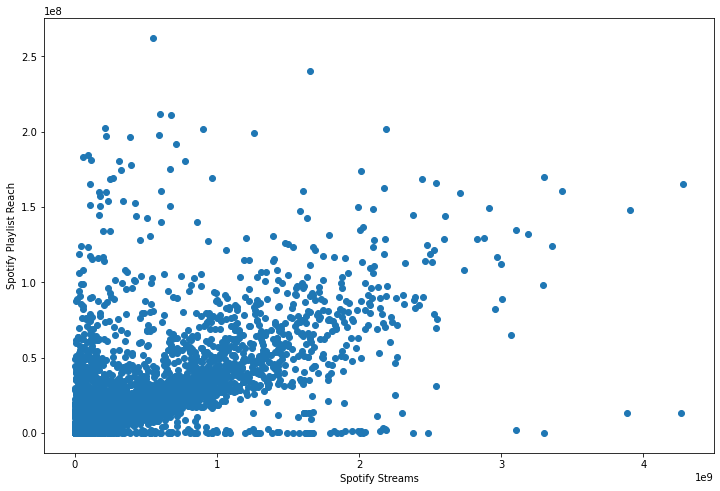

In [25]:
# Create scatterplot.
plt.figure(figsize = (12, 8))
plt.scatter(df['Spotify Streams'], df['Spotify Playlist Reach'])
plt.xlabel('Spotify Streams')
plt.ylabel('Spotify Playlist Reach')
plt.show()

## TikTok Views vs. TikTok Likes

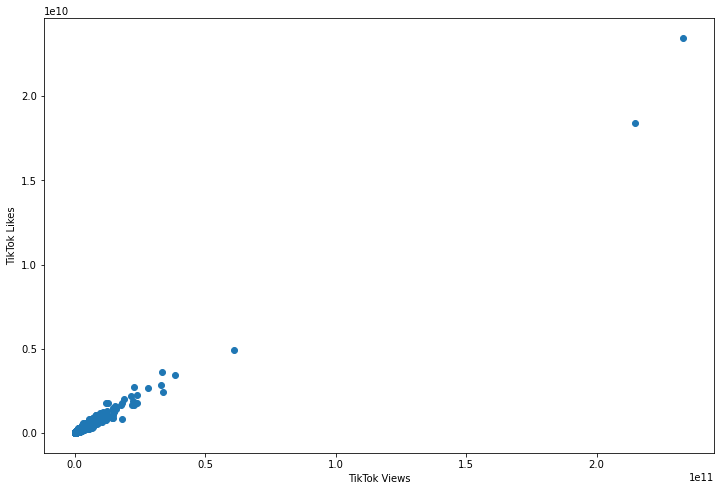

In [26]:
# Create scatterplot.
plt.figure(figsize = (12, 8))
plt.scatter(df['TikTok Views'], df['TikTok Likes'])
plt.xlabel('TikTok Views')
plt.ylabel('TikTok Likes')
plt.show()

In [27]:
# View Outliers.
df.sort_values(by = 'TikTok Views', ascending = False).head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Shazam Counts,Explicit Track,Year
1024,Monkeys Spinning Monkeys,SteamFun - Single,Kevin MacLeod,2011-05-16,USUAN1400011,1018,47.60,11477477.00,7679.00,1490705.00,...,1418397.00,4.00,2557.00,1.00,43207.00,1.00,12735768.50,1177639.00,0,2011
1922,Love You So,The King Khan & BBQ Show,The King Khan & BBQ Show,2005-01-01,USA3D0700101,1918,33.10,16326628.00,12434.00,3542140.00,...,13579446.00,9.00,215.00,12.00,211251.00,12.00,107438.00,632600.00,0,2005
474,Oh No,Cold As Ice,Kreepa,2019-12-13,USUYG1287925,473,70.60,40284121.00,14548.00,3212878.00,...,994245.00,15.00,113.00,12.00,240117.00,4.00,384569.00,31859.00,1,2019
1547,Funny Song,"Vintage Oddities, Vol. 4",Cavendish Music,2018-08-15,GBBGY1743613,1539,37.40,5866282.00,3514.00,462009.00,...,994101.00,28.00,961.00,2.00,43501.00,17.00,24606.00,903944.00,0,2018
113,Aesthetic,Aesthetic,Tollan Kim,2022-03-04,SGB502208576,114,144.00,5712985.00,2311.00,535908.00,...,98142716.00,4.00,22.00,4.00,1397.00,1.00,21564.00,249823.00,0,2022


In [28]:
# Subset df.
df_total_views = df.groupby('Artist',)\
                           [['YouTube Views', 'TikTok Views']].sum().reset_index()

In [29]:
# Add 'Total Views' column.
df_total_views['Total Views'] = df_total_views['YouTube Views']\
                                + df_total_views['TikTok Views']

# View subset.
df_total_views.head()

,Artist,YouTube Views,TikTok Views,Total Views
0,"""XY""",415159148.00,265917250.00,681076398.00
1,$OHO BANI,6744201.00,265917250.00,272661451.00
2,$uicideboy$,987504938.00,1099105933.00,2086610871.00
3,&ME,148269610.00,869444.00,149139054.00
4,(G)I-DLE,1205238799.00,2520097484.00,3725336283.00


In [30]:
# View artists by most views.
df_total_views.sort_values(by = 'Total Views', ascending = False)

,Artist,YouTube Views,TikTok Views,Total Views
963,Kevin MacLeod,11457166.00,233232311463.00,233243768629.00
1713,The King Khan & BBQ Show,7603329.00,214843956590.00,214851559919.00
183,Bad Bunny,25221026702.00,47276595881.00,72497622583.00
988,Kreepa,17978707.00,61088562861.00,61106541568.00
506,Doja Cat,6383737127.00,54323994787.00,60707731914.00
...,...,...,...,...
1569,Scotty McCreery,3113363.00,1218414.00,4331777.00
260,Boy Spyce,3869518.00,50840.00,3920358.00
1592,Shoreline Mafia,3575151.00,108700.00,3683851.00
955,Kenny Chesney,2441458.00,725724.00,3167182.00


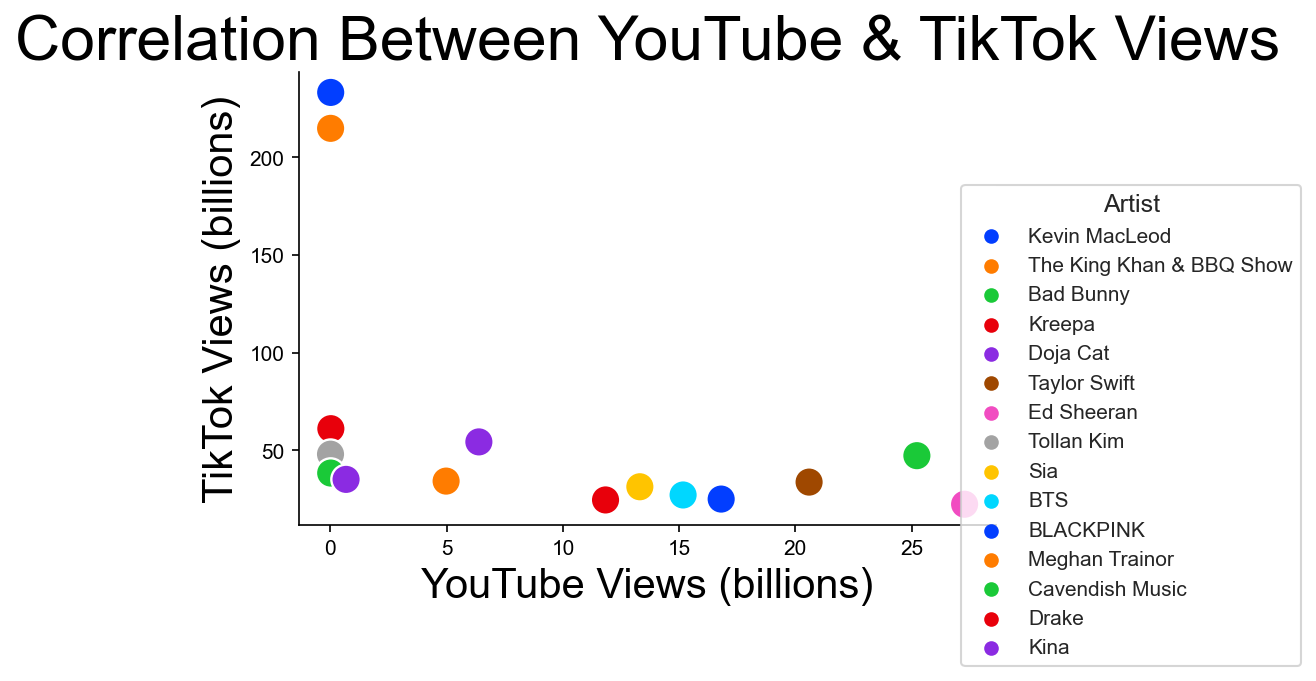

In [31]:
# Define figure.
fig, ax = plt.subplots(dpi = 150)

# Set figure size.
sns.set(rc = {'figure.figsize':(16, 10)})


# Create a line plot.
sns.scatterplot(x = 'YouTube Views', y = 'TikTok Views',
                s = 200,
                hue = 'Artist',
                palette = 'bright',
                data = df_total_views.sort_values(by = 'Total Views',
                                                  ascending = False).head(15))


# Format figure attributes:

# Set plot style.
sns.set_style('white')

#Set title.
plt.title('Correlation Between YouTube & TikTok Views', fontsize = 30)

# Set x and y axis headers.
plt.xlabel('YouTube Views (billions)', fontsize = 20)
plt.ylabel('TikTok Views (billions)', fontsize = 20)

plt.legend(title = 'Artist', fontsize = 10,
           bbox_to_anchor = (.95, .75), loc = 'upper left',
           borderaxespad = 0)

# Ensure axis ticks are present.
sns.set_style('ticks')

# Define the scale of the y-axis for clarity.
scale_y = 1e9
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x / scale_y))
ax.yaxis.set_major_formatter(ticks_y)

# Define the scale of the x-axis for clarity.
scale_x = 1e9
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x / scale_x))
ax.xaxis.set_major_formatter(ticks_x)

# Despine the plot.
sns.despine()


# View the plot.
plt.show()

## Top Artists by Spotify Streams

In [32]:
# Create new dataframe with Artists and their total Spotify Streams.
artists_spotify_info = df[['Artist','Spotify Streams']]

artists_spotify_info = artists_spotify_info.groupby('Artist')\
                       .agg({'Spotify Streams':['sum']}).reset_index()

artists_spotify_info.columns = ['Artist','Spotify_Streams_sum']

sorted_artists_spotify_info = artists_spotify_info.sort_values\
                              (by = 'Spotify_Streams_sum',ascending = False).head(20)

sorted_artists_spotify_info

,Artist,Spotify_Streams_sum
1728,The Weeknd,37188390998.00
183,Bad Bunny,37054834425.00
517,Drake,35202008297.00
1690,Taylor Swift,34470771165.00
1428,Post Malone,26137472958.00
545,Ed Sheeran,24014900390.00
129,Ariana Grande,23464991696.00
1147,MUSIC LAB JPN,22866685573.00
1355,Olivia Rodrigo,19729219749.00
576,Eminem,18878880174.00


## Top Artists by Youtube Views

In [33]:
# Create new dataframe with Artists and their total YouTube Views.
artists_youtube_info = df[['Artist','YouTube Views']]

artists_youtube_info = artists_youtube_info.groupby('Artist')\
                       .agg({'YouTube Views':['sum']}).reset_index()

artists_youtube_info.columns = ['Artist','YouTube_Views_sum']

sorted_artists_youtube_info = artists_youtube_info.sort_values\
                            (by = 'YouTube_Views_sum',ascending = False).head(20)

sorted_artists_youtube_info

,Artist,YouTube_Views_sum
545,Ed Sheeran,27273658604.00
183,Bad Bunny,25221026702.00
1690,Taylor Swift,20585412682.00
129,Ariana Grande,19525948099.00
905,Justin Bieber,19336283617.00
1728,The Weeknd,19080410410.00
1185,Maroon 5,17465688790.00
943,Katy Perry,17400636811.00
915,KAROL G,17173289711.00
167,BLACKPINK,16804170656.00


## Top Artists by Spotify & Youtube

In [34]:
# Combine the dataframes.
spotify_and_youtube_artists = pd.merge(sorted_artists_spotify_info,\
                                       sorted_artists_youtube_info,how = 'inner')

spotify_and_youtube_artists

,Artist,Spotify_Streams_sum,YouTube_Views_sum
0,The Weeknd,37188390998.00,19080410410.00
1,Bad Bunny,37054834425.00,25221026702.00
2,Taylor Swift,34470771165.00,20585412682.00
3,Post Malone,26137472958.00,13613310443.00
4,Ed Sheeran,24014900390.00,27273658604.00
5,Ariana Grande,23464991696.00,19525948099.00
6,Eminem,18878880174.00,14484212736.00
7,Imagine Dragons,17157121647.00,15636287374.00
8,Justin Bieber,16647801287.00,19336283617.00
9,Bruno Mars,16225111478.00,14978888345.00


## View Correlation

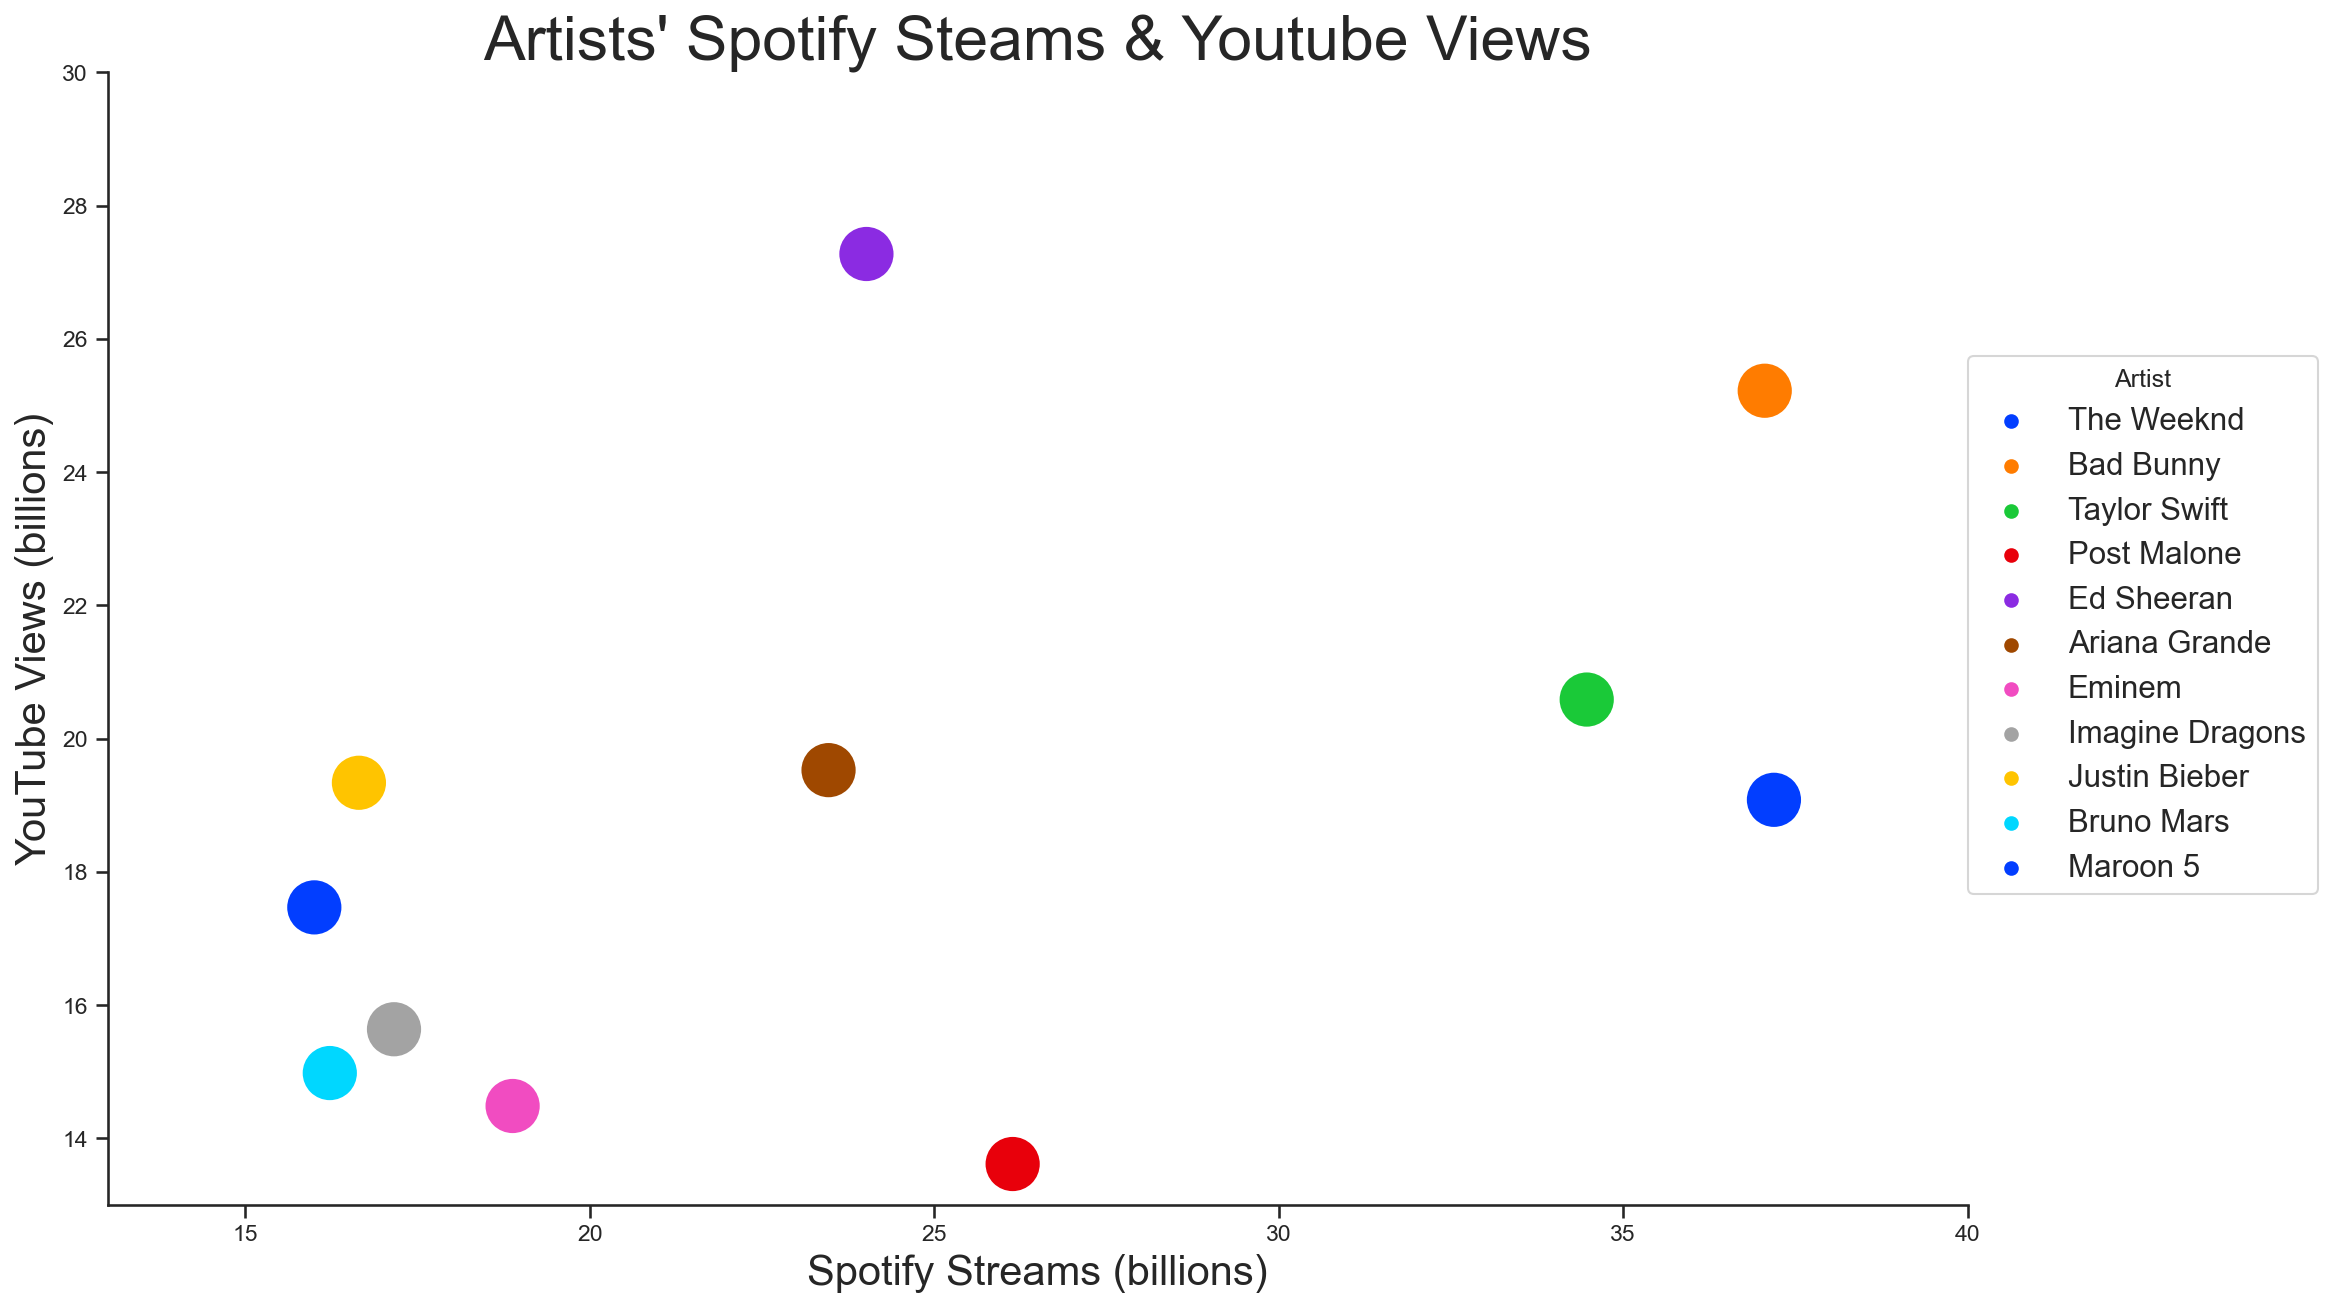

In [35]:
# Define figure.
fig, ax = plt.subplots(dpi = 150)

# Set figure size.
sns.set(rc = {'figure.figsize':(16, 10)})


# Create a line plot.
sns.scatterplot(x = 'Spotify_Streams_sum', y = 'YouTube_Views_sum',
                s = 800,
                hue = 'Artist',
                palette = 'bright',
                data = spotify_and_youtube_artists)


# Format figure attributes:

# Set plot style.
sns.set_style('white')

#Set title.
plt.title("Artists' Spotify Steams & Youtube Views", fontsize = 30)

# Set x and y axis headers.
plt.xlabel('Spotify Streams (billions)', fontsize = 20)
plt.ylabel('YouTube Views (billions)', fontsize = 20)

plt.legend(title = 'Artist', fontsize = 15,
           bbox_to_anchor = (1, .75), loc = 'upper left',
           borderaxespad = 0)

# Ensure axis ticks are present.
sns.set_style('ticks')

# Set axis limits for clearer understanding of the plot.
ax.set_ylim(13000000000, 30000000000)
ax.set_xlim(13000000000, 40000000000)

# Define the scale of the y-axis for clarity.
scale_y = 1e9
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x / scale_y))
ax.yaxis.set_major_formatter(ticks_y)

# Define the scale of the x-axis for clarity.
scale_x = 1e9
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x / scale_x))
ax.xaxis.set_major_formatter(ticks_x)

# Despine the plot.
sns.despine()


# View the plot.
plt.show()

# Multiple Linear Regression

In [36]:
# Define the dependent variable.
y = df['Spotify Streams']  

# Define the independent variables.
# Multiple indepentent variables = capital 'X'.
X = df[['Spotify Playlist Count', 'Shazam Counts']]

In [37]:
# Fit the regression model.
mlr = linear_model.LinearRegression()

mlr.fit(X, y)

LinearRegression()

In [38]:
# Call the predictions for X (array).
mlr.predict(X)

array([2.83244296e+08, 2.55287822e+08, 4.40568224e+08, ...,
       5.07317093e+08, 1.68990099e+08, 2.75400538e+08])

In [39]:
# Print the R-squared value (coefficient of determination).
print("R-squared: ", mlr.score(X,y))

# Print the intercept.
print("Intercept: ", mlr.intercept_)

# Print the coefficients.
print("Coefficients:")

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, mlr.coef_))

R-squared:  0.64445455667879
Intercept:  84779720.94316941
Coefficients:


[('Spotify Playlist Count', 5730.673717998161),
 ('Shazam Counts', 8.407267873881784)]

# K-Means Clustering

In [40]:
# Import necessary libraries.
import matplotlib.cm as cm

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

In [41]:
# Create a new DataFrame containing the 'YouTube Views' and 'Spotify Streams' columns.
df_k = df[['YouTube Views', 'Spotify Streams']]

# view the DataFrame.
print(df_k.shape)
df_k.head()

(4598, 2)


,YouTube Views,Spotify Streams
0,84274754.00,390470936.00
1,116347040.00,323703884.00
2,122599116.00,601309283.00
3,1096100899.00,2031280633.00
4,77373957.00,107034922.00


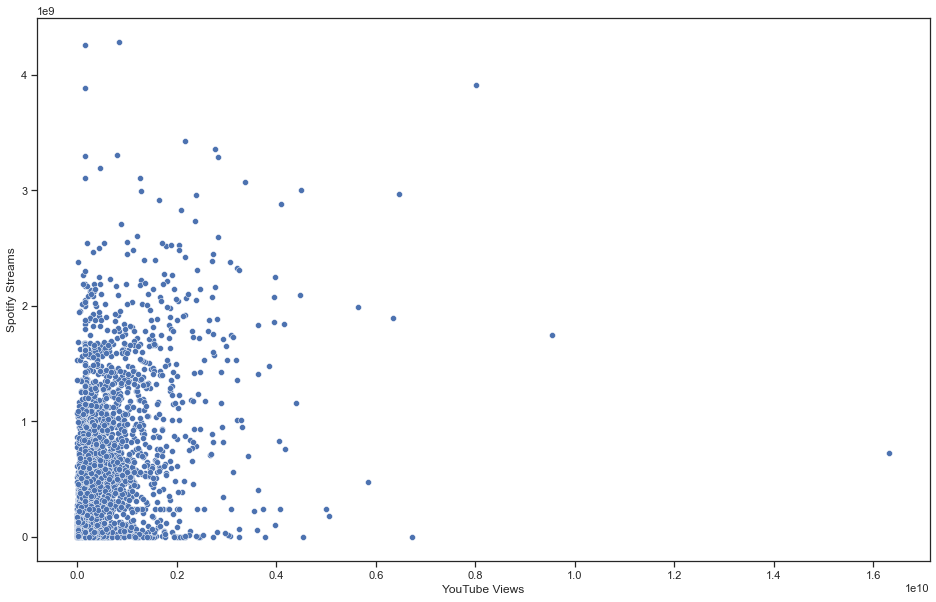

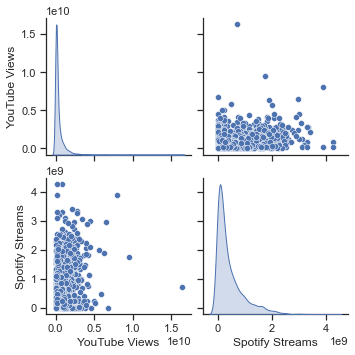

In [42]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x = 'YouTube Views',
                y = 'Spotify Streams',
                data = df_k,)

# Create a pairplot with Seaborn.
x = df_k[['YouTube Views', 'Spotify Streams']]

sns.pairplot(df_k,
             vars = x,
             diag_kind = 'kde')

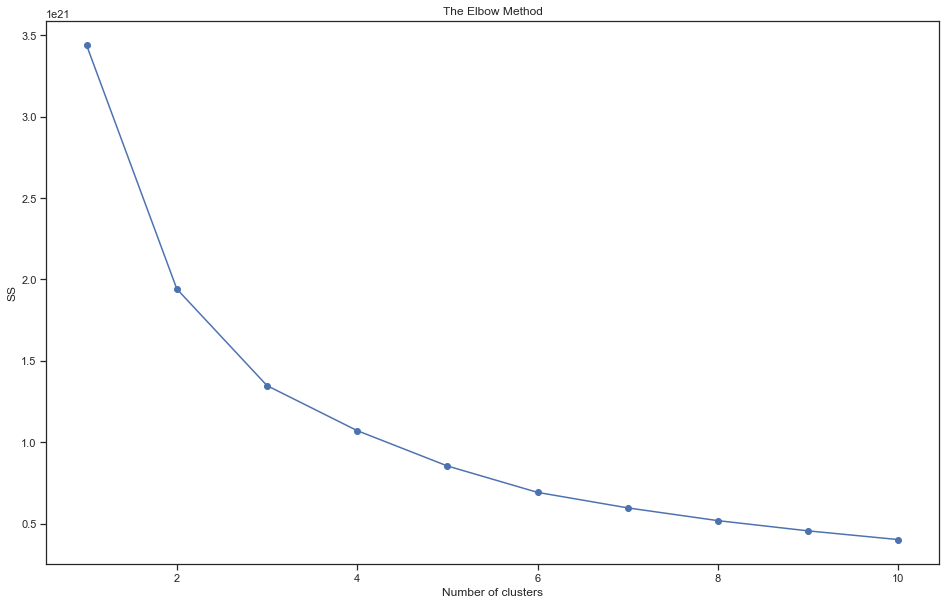

In [43]:
# Elbow chart to help decide on the number of optimal clusters.
# SS = 'Sum of Squares'.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11),
         ss,
         marker = 'o')

# Format Figure Attributes.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

# View plot.
plt.show()

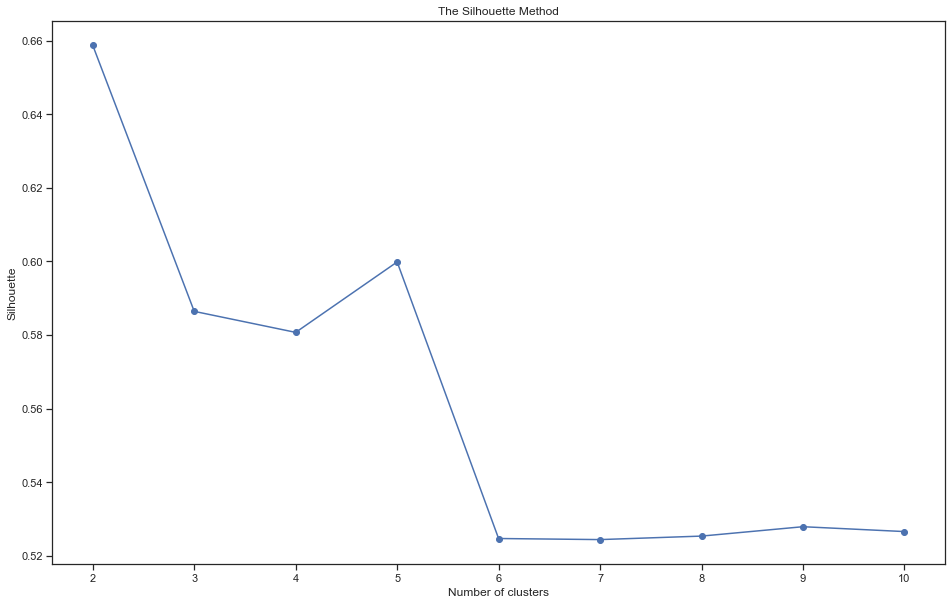

In [44]:
# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker = 'o')

# Format Figure Attributes.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette")

# View plot.
plt.show()

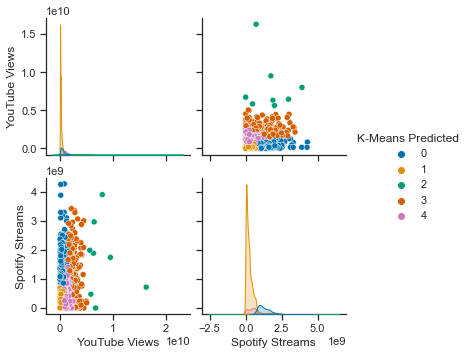

In [45]:
# Use five clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init = 'k-means++',
                random_state = 42).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue = 'K-Means Predicted',
             palette = 'colorblind',
             diag_kind =  'kde')

In [46]:
# View the K-Means predicted.
print(x.head())

   YouTube Views  Spotify Streams  K-Means Predicted
0    84274754.00     390470936.00                  1
1   116347040.00     323703884.00                  1
2   122599116.00     601309283.00                  1
3  1096100899.00    2031280633.00                  0
4    77373957.00     107034922.00                  1


## Visualise The Clusters

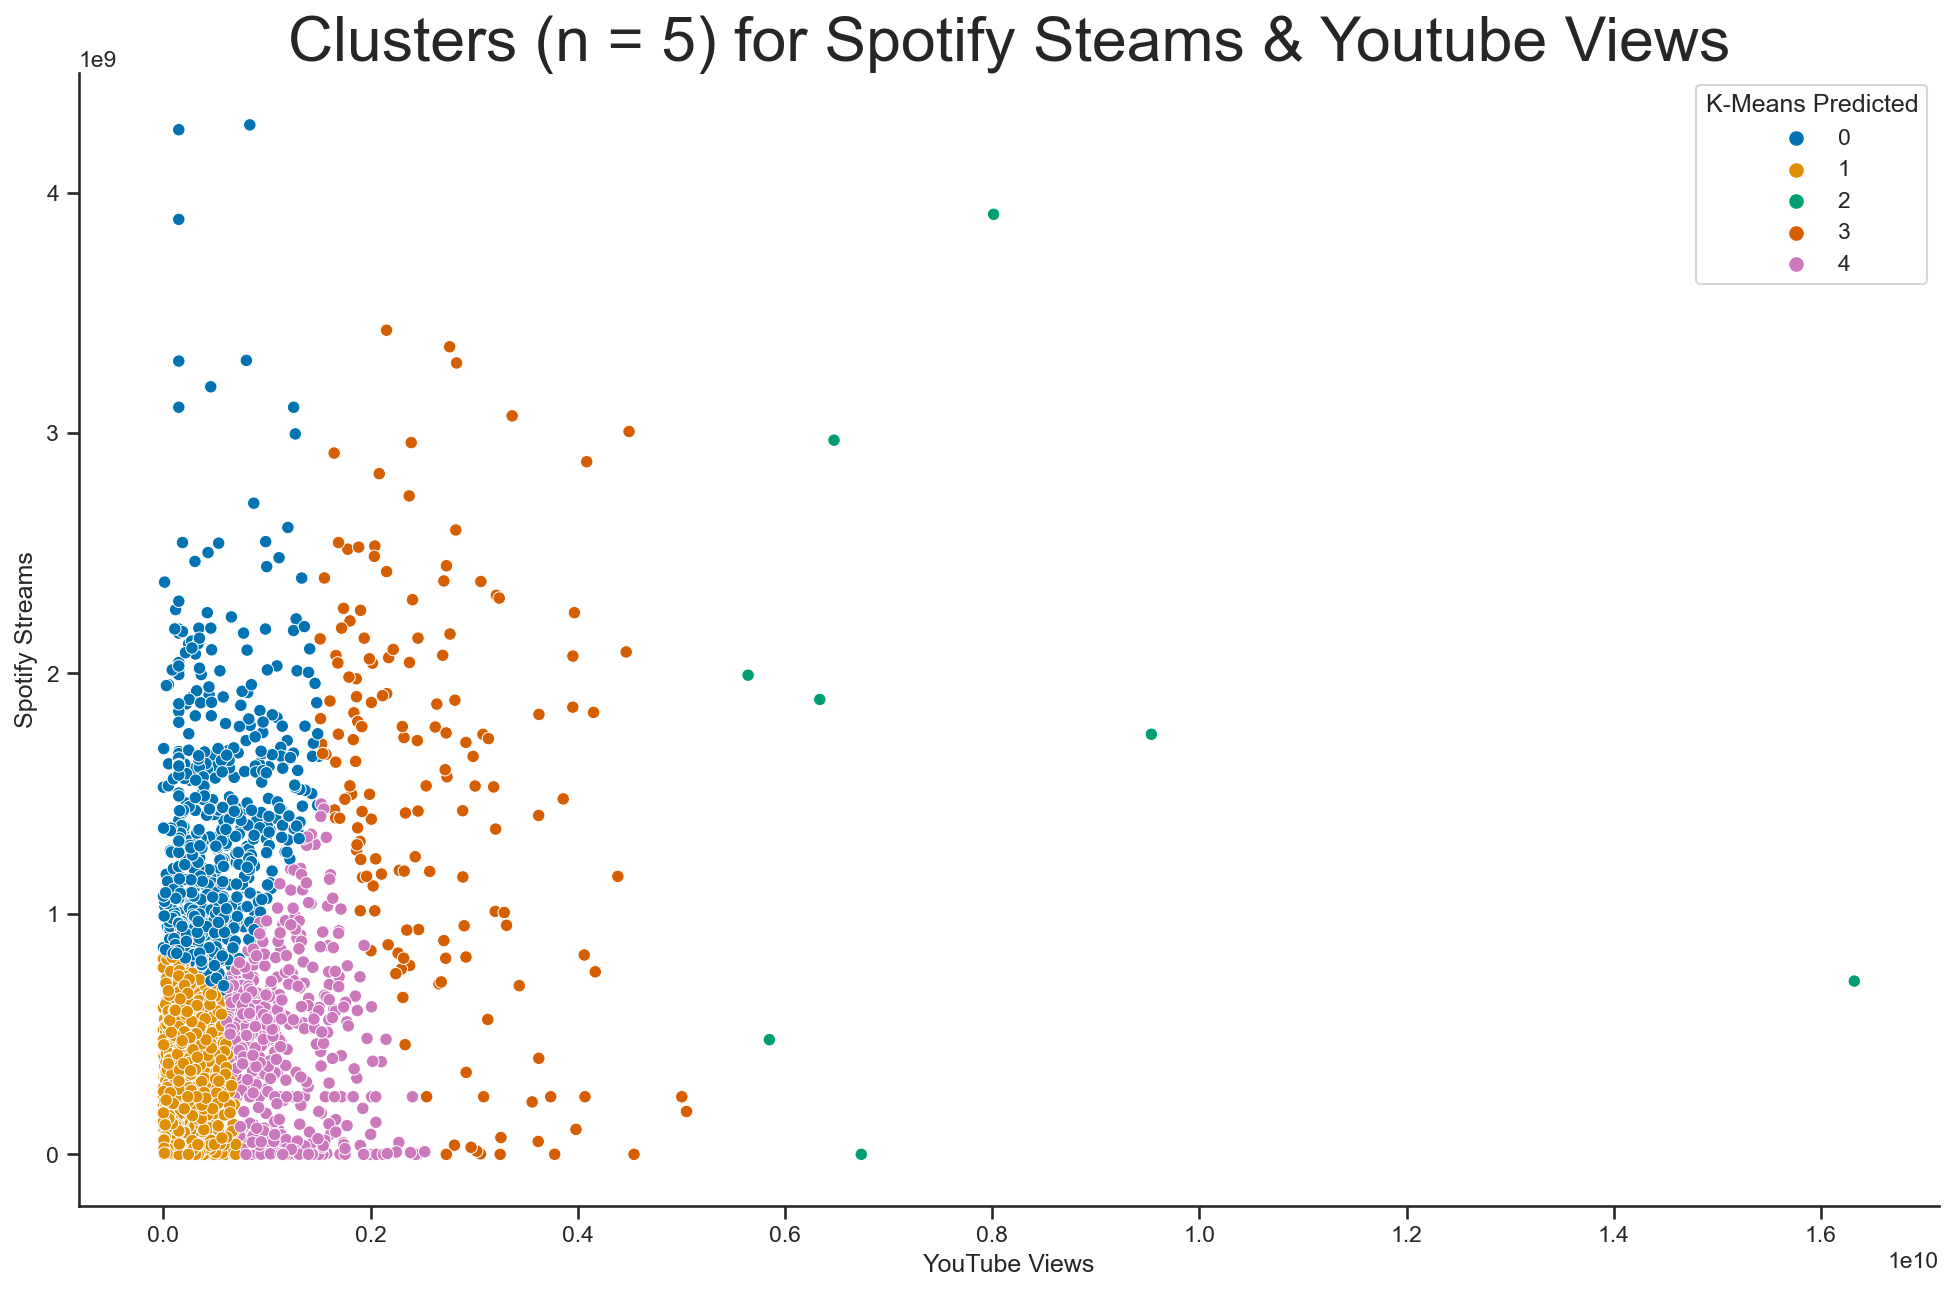

In [48]:
# Define figure.
fig, ax = plt.subplots(dpi = 150)

# Set plot size.
sns.set(rc = {'figure.figsize':(16, 10)})

# Set plot style.
sns.set_style('white')

# Create a scatterplot.
sns.scatterplot(x = 'YouTube Views' , 
                y = 'Spotify Streams',
                data = x,
                hue = 'K-Means Predicted',
                palette = 'colorblind')

#Set title.
plt.title("Clusters (n = 5) for Spotify Steams & Youtube Views", fontsize = 30)

# Ensure axis ticks are present.
sns.set_style('ticks')

# Despine the plot.
sns.despine()